In [2]:
import pandas as pd
import csv
# untuk melakukan proses text processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

# Membaca data dari file CSV yang ada

scrapview = pd.read_csv('tokopedia.csv')
# Menulis ulang hanya kolom 'content' ke file baru
with open('tokopedia.csv', 'w', encoding='utf-8', newline='') as file:
    writer = csv.writer(file)
    # Menulis header
    writer.writerow(['review'])
    # Menulis isi kolom 'content'
    for _, row in scrapview.iterrows():
        writer.writerow([row['content']])


[nltk_data] Downloading package stopwords to C:\Users\Akhdan Farros
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Akhdan Farros
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
app_reviews_df = pd.DataFrame(scrapview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('tokopedia.csv', index=False)

In [4]:
app_reviews_df = pd.DataFrame(scrapview)

jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [5]:
app_reviews_df

,content,product_name
0,"Barang sesuai gambar, pengiriman sesuai jadwal",Tenda S105 Switch Hub 5 Port Ethernet Switch -...
1,"barang cepat sampai, walau L2 agak keras overa...",Gamepad single Usb M-Tech/stick laptop/stick p...
2,Produk dan pengiriman baik,TINTA / CATRIDGE HP 678 BLACK / COLOR ORIGINAL...
3,"barang sesuai, bekerja dengan baik",USB HUB 4 port USB 3.0 / USB HUB 3.0 &#40;4por...
4,bingung install softwarenya gak komplit atau m...,4.0 Bluetooth CSR 4.0 Dongle&#40;usb kecil&#41;
...,...,...
4995,Warna sesuai pilihan. Smua port menyala,USB HUB 3.0 7 port by DIGIGEAR HIGH SPEED 1.2 ...
4996,"Barang sudah terima, tinggal test aja. Makasih...",Baterai Original Lenovo E430 E431 E435 E440 E4...
4997,bagus sekali terima kasih sukses selalu,Gamepad single Usb M-Tech/stick laptop/stick p...
4998,"Mantap gan, barang bekerja dengan sempurna dan...",Keyboard ASUS X45 X45A X45U X45VD X45C


In [6]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content       5000 non-null   object
 1   product_name  5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


# Preprocessing

In [7]:
clean_df = app_reviews_df.dropna()

In [8]:
clean_df = clean_df.drop_duplicates()

jumlah_ulasan_after, jumlah_kolom_after = clean_df.shape

In [9]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content       5000 non-null   object
 1   product_name  5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


In [15]:
import re
import string
# cleaning teks
def cleaningText(text):
  #menghapus add
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  #menghapus tag
  text = re.sub(r'#[A-Za-z0-9]', '', text)
  #menghapus retweet
  text = re.sub(r'RT[\s]+', '', text)
  #menghapus tautan
  text = re.sub(r'https?:\/\/\S+', '', text)
  #menghapus angka
  text = re.sub(r'[0-9]+', '', text)
  #menghapus selain angka dan huruf
  text = re.sub(r'[^\w\s]', '', text)
  #mengganti baris menjadi spasi
  text = text.replace('\n', ' ')
  #menghapus semua tanda baca
  text = text.translate(str.maketrans('', '', string.punctuation))
  #menghapus spasi di awal dan akhir
  text = text.strip(' ')
  return text

#fungsi untuk mengubah jenis huruf
def caseFoldingText(text):
  #mengubah keseluruhan teks menjadi huruf kecil semua
  text = text.lower()
  return text

#fungsi untuk tokenisasi
def tokenizingText(text):
  #memberi token tiap huruf untuk diproses
  text = word_tokenize(text)
  return text

#fungsi untuk memfilter teks dari kata-kata yang tidak penting
def filteringText(text):
    # Mengambil daftar stopwords bahasa Indonesia
    listStopwords = set(stopwords.words('indonesian'))

    # Daftar kata-kata yang tidak ingin difilter
    words_to_keep = ['tidak', 'enggak', 'ga', 'ngga', 'engga']

    # Menghapus kata-kata yang ada dalam 'words_to_keep' dari daftar stopwords
    listStopwords = listStopwords - set(words_to_keep)

    # Penampung hasil setelah memfilter stopwords
    filtered = [word for word in text if word not in listStopwords]
    return filtered


#fungsi untuk mengubah imbuhan menjadi kata dasar
#pemilihan mengapa stemming karna proses lebih cepat dibanding lemmatization
def stemmingText(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  words = text.split()
  stemmed_words = [stemmer.stem(word) for word in words]
  stemmed = ' '.join(stemmed_words)
  return stemmed

def toSentence(list_words):
  sentence = ' '.join(word for word in list_words)
  return sentence

In [18]:
import pandas as pd

slangwords_df = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv')

slang_to_formal_dict = dict(zip(slangwords_df['slang'], slangwords_df['formal']))

def replaceSlang(text):
  words = text.split()
  replaced_words = [slang_to_formal_dict.get(word, word) for word in words]
  return ' '.join(replaced_words)

In [19]:
clean_df

,content,product_name
0,"Barang sesuai gambar, pengiriman sesuai jadwal",Tenda S105 Switch Hub 5 Port Ethernet Switch -...
1,"barang cepat sampai, walau L2 agak keras overa...",Gamepad single Usb M-Tech/stick laptop/stick p...
2,Produk dan pengiriman baik,TINTA / CATRIDGE HP 678 BLACK / COLOR ORIGINAL...
3,"barang sesuai, bekerja dengan baik",USB HUB 4 port USB 3.0 / USB HUB 3.0 &#40;4por...
4,bingung install softwarenya gak komplit atau m...,4.0 Bluetooth CSR 4.0 Dongle&#40;usb kecil&#41;
...,...,...
4995,Warna sesuai pilihan. Smua port menyala,USB HUB 3.0 7 port by DIGIGEAR HIGH SPEED 1.2 ...
4996,"Barang sudah terima, tinggal test aja. Makasih...",Baterai Original Lenovo E430 E431 E435 E440 E4...
4997,bagus sekali terima kasih sukses selalu,Gamepad single Usb M-Tech/stick laptop/stick p...
4998,"Mantap gan, barang bekerja dengan sempurna dan...",Keyboard ASUS X45 X45A X45U X45VD X45C


In [20]:
# menerapkan fungsi case folding pada clean_df


clean_df['text_cleaning'] = clean_df['content'].apply(cleaningText)

# menerapkan fungsi case folding pada clean_df
clean_df['case_folding'] = clean_df['text_cleaning'].apply(caseFoldingText)

#menerapkan slangwords pada clean_df
clean_df['slang_words'] = clean_df['case_folding'].apply(replaceSlang)

# menerapkan fungsi token pada slangwords
clean_df['tokenization'] = clean_df['slang_words'].apply(tokenizingText)

# menerapkan fungsi filtering pada tokenization
clean_df['filtering'] = clean_df['tokenization'].apply(filteringText)

clean_df['merge_text'] = clean_df['filtering'].apply(toSentence)

#test slangwords
sample_text = "aplikasi nya slalu lelet bgt"

clean_sample_text = replaceSlang(sample_text)
print(clean_sample_text)
# Menampilkan 5 baris pertama pada kolom 'text_cleaning'
display(clean_df[['merge_text']])



aplikasi nya selalu lelet banget


,merge_text
0,barang sesuai gambar pengiriman sesuai jadwal
1,barang cepat l keras overall good semoga awet
2,produk pengiriman
3,barang sesuai
4,bingung install softwarenya enggak komplit eng...
...,...
4995,warna sesuai pilihan port menyala
4996,barang terima tinggal test terima kasih gan
4997,bagus terima kasih sukses
4998,mantap gan barang sempurna awet thanks ya gan


In [21]:
# Menampilkan baris tertentu berdasarkan indeks
selected_indices = [3984, 2164,1673,1405,4981, 4986, 3891, 953,528,653]

# Menampilkan kolom yang diinginkan untuk baris yang telah dipilih
display(clean_df[['content', 'text_cleaning']].iloc[selected_indices])
display(clean_df[['text_cleaning', 'case_folding']].iloc[selected_indices])
display(clean_df[['case_folding', 'slang_words']].iloc[selected_indices])
display(clean_df[['slang_words', 'tokenization']].iloc[selected_indices])
display(clean_df[['tokenization', 'filtering']].iloc[selected_indices])
display(clean_df[['filtering', 'merge_text']].iloc[selected_indices])


,content,text_cleaning
3984,Alhamdulillah Barang sudah kami terima sesuai ...,Alhamdulillah Barang sudah kami terima sesuai ...
2164,"Pas sesuai diiklan, mantap, kecepatan respon p...",Pas sesuai diiklan mantap kecepatan respon pen...
1673,Mantaap. Murah. ori. packing Ok. sudah di pasa...,Mantaap Murah ori packing Ok sudah di pasang l...
1405,beuuh mantap barangnya laptop saya bisa nyala ...,beuuh mantap barangnya laptop saya bisa nyala ...
4981,Mantaaaaaaaaaaaaafffff,Mantaaaaaaaaaaaaafffff
4986,Topppppppp ntappppppp 👏🏻👏🏻👏🏻👏🏻👌🏻,Topppppppp ntappppppp
3891,Koneksi jelek... Sering tidak terbaca.... Repo...,Koneksi jelek Sering tidak terbaca Repot mesti...
953,"mengecewakan, tidak sesuai deskripsi, tidak co...",mengecewakan tidak sesuai deskripsi tidak comp...
528,rusak gabisa dipake. mati matian,rusak gabisa dipake mati matian
653,Penjual tidak melakukan pengechekan produk den...,Penjual tidak melakukan pengechekan produk den...


,text_cleaning,case_folding
3984,Alhamdulillah Barang sudah kami terima sesuai ...,alhamdulillah barang sudah kami terima sesuai ...
2164,Pas sesuai diiklan mantap kecepatan respon pen...,pas sesuai diiklan mantap kecepatan respon pen...
1673,Mantaap Murah ori packing Ok sudah di pasang l...,mantaap murah ori packing ok sudah di pasang l...
1405,beuuh mantap barangnya laptop saya bisa nyala ...,beuuh mantap barangnya laptop saya bisa nyala ...
4981,Mantaaaaaaaaaaaaafffff,mantaaaaaaaaaaaaafffff
4986,Topppppppp ntappppppp,topppppppp ntappppppp
3891,Koneksi jelek Sering tidak terbaca Repot mesti...,koneksi jelek sering tidak terbaca repot mesti...
953,mengecewakan tidak sesuai deskripsi tidak comp...,mengecewakan tidak sesuai deskripsi tidak comp...
528,rusak gabisa dipake mati matian,rusak gabisa dipake mati matian
653,Penjual tidak melakukan pengechekan produk den...,penjual tidak melakukan pengechekan produk den...


,case_folding,slang_words
3984,alhamdulillah barang sudah kami terima sesuai ...,alhamdulillah barang sudah kami terima sesuai ...
2164,pas sesuai diiklan mantap kecepatan respon pen...,pas sesuai diiklan mantap kecepatan respon pen...
1673,mantaap murah ori packing ok sudah di pasang l...,mantap murah orisinal packing ok sudah di pasa...
1405,beuuh mantap barangnya laptop saya bisa nyala ...,beuuh mantap barangnya laptop saya bisa nyala ...
4981,mantaaaaaaaaaaaaafffff,mantaaaaaaaaaaaaafffff
4986,topppppppp ntappppppp,topppppppp ntappppppp
3891,koneksi jelek sering tidak terbaca repot mesti...,koneksi jelek sering tidak terbaca repot mesti...
953,mengecewakan tidak sesuai deskripsi tidak comp...,mengecewakan tidak sesuai deskripsi tidak comp...
528,rusak gabisa dipake mati matian,rusak enggak bisa dipakai mati matian
653,penjual tidak melakukan pengechekan produk den...,penjual tidak melakukan pengechekan produk den...


,slang_words,tokenization
3984,alhamdulillah barang sudah kami terima sesuai ...,"[alhamdulillah, barang, sudah, kami, terima, s..."
2164,pas sesuai diiklan mantap kecepatan respon pen...,"[pas, sesuai, diiklan, mantap, kecepatan, resp..."
1673,mantap murah orisinal packing ok sudah di pasa...,"[mantap, murah, orisinal, packing, ok, sudah, ..."
1405,beuuh mantap barangnya laptop saya bisa nyala ...,"[beuuh, mantap, barangnya, laptop, saya, bisa,..."
4981,mantaaaaaaaaaaaaafffff,[mantaaaaaaaaaaaaafffff]
4986,topppppppp ntappppppp,"[topppppppp, ntappppppp]"
3891,koneksi jelek sering tidak terbaca repot mesti...,"[koneksi, jelek, sering, tidak, terbaca, repot..."
953,mengecewakan tidak sesuai deskripsi tidak comp...,"[mengecewakan, tidak, sesuai, deskripsi, tidak..."
528,rusak enggak bisa dipakai mati matian,"[rusak, enggak, bisa, dipakai, mati, matian]"
653,penjual tidak melakukan pengechekan produk den...,"[penjual, tidak, melakukan, pengechekan, produ..."


,tokenization,filtering
3984,"[alhamdulillah, barang, sudah, kami, terima, s...","[alhamdulillah, barang, terima, sesuai, pesana..."
2164,"[pas, sesuai, diiklan, mantap, kecepatan, resp...","[pas, sesuai, diiklan, mantap, kecepatan, resp..."
1673,"[mantap, murah, orisinal, packing, ok, sudah, ...","[mantap, murah, orisinal, packing, ok, pasang,..."
1405,"[beuuh, mantap, barangnya, laptop, saya, bisa,...","[beuuh, mantap, barangnya, laptop, nyala, seki..."
4981,[mantaaaaaaaaaaaaafffff],[mantaaaaaaaaaaaaafffff]
4986,"[topppppppp, ntappppppp]","[topppppppp, ntappppppp]"
3891,"[koneksi, jelek, sering, tidak, terbaca, repot...","[koneksi, jelek, tidak, terbaca, repot, mesti,..."
953,"[mengecewakan, tidak, sesuai, deskripsi, tidak...","[mengecewakan, tidak, sesuai, deskripsi, tidak..."
528,"[rusak, enggak, bisa, dipakai, mati, matian]","[rusak, enggak, dipakai, mati, matian]"
653,"[penjual, tidak, melakukan, pengechekan, produ...","[penjual, tidak, pengechekan, produk, barang, ..."


,filtering,merge_text
3984,"[alhamdulillah, barang, terima, sesuai, pesana...",alhamdulillah barang terima sesuai pesanan pac...
2164,"[pas, sesuai, diiklan, mantap, kecepatan, resp...",pas sesuai diiklan mantap kecepatan respon pen...
1673,"[mantap, murah, orisinal, packing, ok, pasang,...",mantap murah orisinal packing ok pasang langsu...
1405,"[beuuh, mantap, barangnya, laptop, nyala, seki...",beuuh mantap barangnya laptop nyala sekian ses...
4981,[mantaaaaaaaaaaaaafffff],mantaaaaaaaaaaaaafffff
4986,"[topppppppp, ntappppppp]",topppppppp ntappppppp
3891,"[koneksi, jelek, tidak, terbaca, repot, mesti,...",koneksi jelek tidak terbaca repot mesti re plu...
953,"[mengecewakan, tidak, sesuai, deskripsi, tidak...",mengecewakan tidak sesuai deskripsi tidak comp...
528,"[rusak, enggak, dipakai, mati, matian]",rusak enggak dipakai mati matian
653,"[penjual, tidak, pengechekan, produk, barang, ...",penjual tidak pengechekan produk barang rusak ...


In [22]:
# # jikA terdapat string kosong pada merge_text maka kita perlu menghapusnya
# clean_df.replace('', float('NaN'), inplace=True)
# clean_df.dropna(subset=['merge_text'], inplace=True)

clean_df['merge_text']
#otomatis jumlah baris berkurang

0           barang sesuai gambar pengiriman sesuai jadwal
1           barang cepat l keras overall good semoga awet
2                                       produk pengiriman
3                                           barang sesuai
4       bingung install softwarenya enggak komplit eng...
                              ...                        
4995                    warna sesuai pilihan port menyala
4996          barang terima tinggal test terima kasih gan
4997                            bagus terima kasih sukses
4998        mantap gan barang sempurna awet thanks ya gan
4999                                        packing bagus
Name: merge_text, Length: 5000, dtype: object

    # Labeling

In [23]:
import csv
import requests
from io import StringIO

raw_positive_words = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    print("Positive words loaded successfully.")
    positive_words_csv = StringIO(response.text)
    positive_words = csv.reader(positive_words_csv, delimiter=',')
    for row in positive_words:
        raw_positive_words[row[0]] = int(row[1])
else:
    print("Failed to load positive words.")

raw_negative_words = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    print("Negative words loaded successfully.")

    negative_words_csv = StringIO(response.text)
    negative_words = csv.reader(negative_words_csv, delimiter=',')
    for row in negative_words:
        raw_negative_words[row[0]] = int(row[1])
else:
    print("Failed to load negative words.")



Positive words loaded successfully.
Negative words loaded successfully.


In [24]:
def sentiment_analysis_score(text):
    # Pastikan text adalah string, jika berupa list gabungkan menjadi satu string
    if isinstance(text, list):
        text = " ".join(text)  # Gabungkan list menjadi satu string

    words = text.split()  # Memecah teks menjadi kata-kata
    score = 0
    word_scores = {}

    # Menghitung skor untuk setiap kata
    for word in words:
        word_score = 0
        if word in raw_positive_words:
            word_score += raw_positive_words[word]
        if word in raw_negative_words:
            word_score += raw_negative_words[word]
        
        word_scores[word] = word_score
        score += word_score

    # Tentukan polaritas berdasarkan skor
    polaritas = ''
    if score > 0.3:
        polaritas = 'positive'
    elif score < -0.3:
        polaritas = 'negative'
    else:
        polaritas = 'neutral'

    return score, polaritas, word_scores


In [25]:
import pandas as pd

# Mengatur batasan lebar kolom untuk menampilkan teks panjang dengan titik-titik ("...")
pd.set_option('display.max_colwidth', None)  # Mengubah batas lebar kolom menjadi None agar teks tampil penuh

# Menerapkan analisis sentimen pada kolom 'filtering'
results = clean_df['filtering'].apply(sentiment_analysis_score)
results = list(zip(*results))

# Menambahkan kolom 'polarity_score', 'sentiment', dan 'word_scores' ke DataFrame
clean_df['polarity_score'] = results[0]
clean_df['sentiment'] = results[1]
clean_df['word_scores'] = results[2]

# Menampilkan distribusi sentimen
print("Distribusi Sentimen:")
print(clean_df['sentiment'].value_counts())

# Menampilkan kolom 'merge_text', 'sentiment', 'polarity_score', dan 'word_scores' untuk baris tertentu
selected_indices = [3984, 2164,1673,1405,4981, 4986, 3891, 953,528,653]

# Memastikan indeks yang dipilih valid
valid_indices = [i for i in selected_indices if i < len(clean_df)]

# Jika ada indeks yang valid, tampilkan data untuk kolom yang diinginkan
if valid_indices:
    display(clean_df[['merge_text', 'sentiment', 'polarity_score', 'word_scores']].iloc[valid_indices])
else:
    print("Tidak ada indeks yang valid untuk ditampilkan.")


Distribusi Sentimen:
sentiment
positive    3370
negative     930
neutral      700
Name: count, dtype: int64


,merge_text,sentiment,polarity_score,word_scores
3984,alhamdulillah barang terima sesuai pesanan packing good barang bagus tinggal pasang semoga awet bermanfaat terima kasih senang berbisnis,positive,28,"{'alhamdulillah': 5, 'barang': 0, 'terima': 2, 'sesuai': 3, 'pesanan': 0, 'packing': 0, 'good': 5, 'bagus': -2, 'tinggal': -2, 'pasang': 4, 'semoga': 0, 'awet': 4, 'bermanfaat': 5, 'kasih': 1, 'senang': 1, 'berbisnis': 0}"
2164,pas sesuai diiklan mantap kecepatan respon penjual cepat packing rapi pengirimannya cepat paket reguler rekomended,positive,22,"{'pas': 3, 'sesuai': 3, 'diiklan': 0, 'mantap': 5, 'kecepatan': 4, 'respon': 2, 'penjual': 0, 'cepat': 0, 'packing': 0, 'rapi': 1, 'pengirimannya': 0, 'paket': 4, 'reguler': 0, 'rekomended': 0}"
1673,mantap murah orisinal packing ok pasang langsung ngacir nge printnya thanks seller for other buyer dont hesitate buy here,positive,23,"{'mantap': 5, 'murah': 1, 'orisinal': 3, 'packing': 0, 'ok': 4, 'pasang': 4, 'langsung': 3, 'ngacir': 0, 'nge': 0, 'printnya': 0, 'thanks': 3, 'seller': 0, 'for': 0, 'other': 0, 'buyer': 0, 'dont': 0, 'hesitate': 0, 'buy': 0, 'here': 0}"
1405,beuuh mantap barangnya laptop nyala sekian sesuai foto nya mantap respon seller nya cepat jam dikirim besoknya dikirim mantap ya sukses ya,positive,38,"{'beuuh': 0, 'mantap': 5, 'barangnya': 0, 'laptop': 0, 'nyala': 0, 'sekian': 0, 'sesuai': 3, 'foto': 3, 'nya': 0, 'respon': 2, 'seller': 0, 'cepat': 0, 'jam': 0, 'dikirim': 2, 'besoknya': 0, 'ya': 4, 'sukses': 3}"
4981,mantaaaaaaaaaaaaafffff,neutral,0,{'mantaaaaaaaaaaaaafffff': 0}
4986,topppppppp ntappppppp,neutral,0,"{'topppppppp': 0, 'ntappppppp': 0}"
3891,koneksi jelek tidak terbaca repot mesti re plug ulang tidak terbaca,negative,-25,"{'koneksi': -2, 'jelek': -5, 'tidak': -5, 'terbaca': 0, 'repot': -5, 'mesti': -3, 're': 0, 'plug': 0, 'ulang': 0}"
953,mengecewakan tidak sesuai deskripsi tidak compatible usb,negative,-14,"{'mengecewakan': -3, 'tidak': -5, 'sesuai': 3, 'deskripsi': -4, 'compatible': 0, 'usb': 0}"
528,rusak enggak dipakai mati matian,negative,-2,"{'rusak': -1, 'enggak': 0, 'dipakai': 0, 'mati': -1, 'matian': 0}"
653,penjual tidak pengechekan produk barang rusak semoga tidak terulang kwmbalisemoga sukses,negative,-5,"{'penjual': 0, 'tidak': -5, 'pengechekan': 0, 'produk': 3, 'barang': 0, 'rusak': -1, 'semoga': 0, 'terulang': 0, 'kwmbalisemoga': 0, 'sukses': 3}"


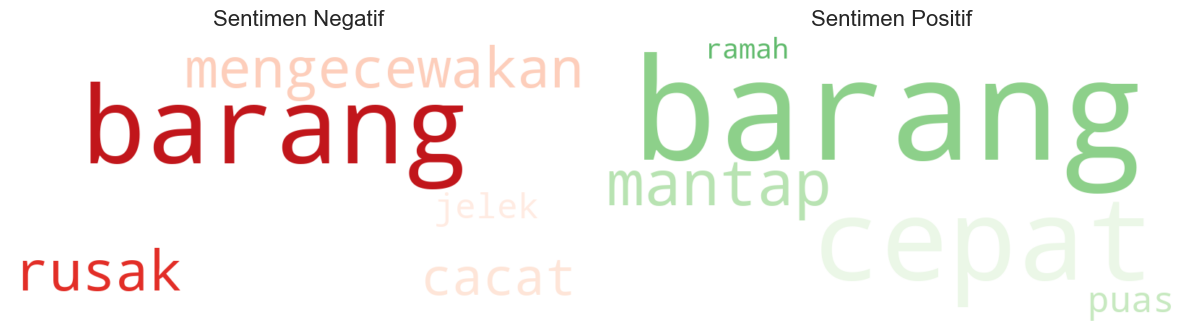

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Kata-kata negatif
negative_keywords = ["barang", "rusak", "mengecewakan", "cacat", "jelek"]
negative_texts = clean_df[clean_df['sentiment'] == 'negative']['merge_text']
vectorizer_neg = CountVectorizer(vocabulary=negative_keywords)
word_counts_neg = vectorizer_neg.fit_transform(negative_texts)
word_sums_neg = word_counts_neg.sum(axis=0)
negative_word_freq = {word: word_sums_neg[0, idx] for word, idx in vectorizer_neg.vocabulary_.items()}

# Kata-kata positif
positive_keywords = ["barang", "cepat", "puas", "mantap", "ramah"]
positive_texts = clean_df[clean_df['sentiment'] == 'positive']['merge_text']
vectorizer_pos = CountVectorizer(vocabulary=positive_keywords)
word_counts_pos = vectorizer_pos.fit_transform(positive_texts)
word_sums_pos = word_counts_pos.sum(axis=0)
positive_word_freq = {word: word_sums_pos[0, idx] for word, idx in vectorizer_pos.vocabulary_.items()}

# Buat Word Cloud untuk kata-kata negatif
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(negative_word_freq)

# Buat Word Cloud untuk kata-kata positif
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate_from_frequencies(positive_word_freq)

# Tampilkan Word Cloud
plt.figure(figsize=(12, 6))

# Word Cloud Negatif
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Sentimen Negatif", fontsize=16)

# Word Cloud Positif
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Sentimen Positif", fontsize=16)

plt.tight_layout()
plt.show()


In [27]:
# Kata kunci negatif untuk strategi pemasaran
marketing_keywords = ['cacat', 'mengecewakan', 'rusak','jelek']

# Filter data yang mengandung kata kunci negatif untuk strategi pemasaran
marketing_filtered = clean_df[
    (clean_df['sentiment'] == 'negative') &
    (clean_df['merge_text'].str.contains('|'.join(marketing_keywords), case=False, na=False))
]

# Menambahkan kolom 'marketing_strategy' untuk strategi pemasaran
marketing_filtered['marketing_strategy'] = ('-Lakukan Permohonan Maaf'
                                            '-Lakukan Retur Barang')

# Memilih hanya baris 528 dan 612
selected_rows = marketing_filtered.loc[[3891,953,528, 653]]

# Menampilkan tabel strategi pemasaran untuk baris 528 dan 612
print("\nTabel Strategi Pemasaran:")
display(selected_rows[['merge_text', 'sentiment', 'marketing_strategy']])



Tabel Strategi Pemasaran:


C:\Users\Akhdan Farros R\AppData\Local\Temp\ipykernel_12884\774108426.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_filtered['marketing_strategy'] = ('-Lakukan Permohonan Maaf'


,merge_text,sentiment,marketing_strategy
3891,koneksi jelek tidak terbaca repot mesti re plug ulang tidak terbaca,negative,-Lakukan Permohonan Maaf-Lakukan Retur Barang
953,mengecewakan tidak sesuai deskripsi tidak compatible usb,negative,-Lakukan Permohonan Maaf-Lakukan Retur Barang
528,rusak enggak dipakai mati matian,negative,-Lakukan Permohonan Maaf-Lakukan Retur Barang
653,penjual tidak pengechekan produk barang rusak semoga tidak terulang kwmbalisemoga sukses,negative,-Lakukan Permohonan Maaf-Lakukan Retur Barang


In [28]:
# Kata kunci negatif untuk strategi pemasaran
marketing_keywords = ['cepat', 'puas', 'ramah','bagus',"mantap"]

# Filter data yang mengandung kata kunci negatif untuk strategi pemasaran
marketing_filtered = clean_df[
    (clean_df['sentiment'] == 'positive') &
    (clean_df['merge_text'].str.contains('|'.join(marketing_keywords), case=False, na=False))
]

# Menambahkan kolom 'marketing_strategy' untuk strategi pemasaran
marketing_filtered['marketing_strategy'] = ('-Beri diskon atau Kupon untuk Pembelian selanjutnya')

# Memilih hanya baris 528 dan 612
selected_rows = marketing_filtered.loc[[3984, 2164,1673,1405]]

# Menampilkan tabel strategi pemasaran untuk baris 528 dan 612
print("\nTabel Strategi Pemasaran:")
display(selected_rows[['merge_text', 'sentiment', 'marketing_strategy']])


Tabel Strategi Pemasaran:


C:\Users\Akhdan Farros R\AppData\Local\Temp\ipykernel_12884\4073497868.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_filtered['marketing_strategy'] = ('-Beri diskon atau Kupon untuk Pembelian selanjutnya')


,merge_text,sentiment,marketing_strategy
3984,alhamdulillah barang terima sesuai pesanan packing good barang bagus tinggal pasang semoga awet bermanfaat terima kasih senang berbisnis,positive,-Beri diskon atau Kupon untuk Pembelian selanjutnya
2164,pas sesuai diiklan mantap kecepatan respon penjual cepat packing rapi pengirimannya cepat paket reguler rekomended,positive,-Beri diskon atau Kupon untuk Pembelian selanjutnya
1673,mantap murah orisinal packing ok pasang langsung ngacir nge printnya thanks seller for other buyer dont hesitate buy here,positive,-Beri diskon atau Kupon untuk Pembelian selanjutnya
1405,beuuh mantap barangnya laptop nyala sekian sesuai foto nya mantap respon seller nya cepat jam dikirim besoknya dikirim mantap ya sukses ya,positive,-Beri diskon atau Kupon untuk Pembelian selanjutnya


In [29]:
# Filter data yang hanya memiliki sentimen neutral
neutral_filtered = clean_df[clean_df['sentiment'] == 'neutral']

# Menambahkan kolom 'marketing_strategy' untuk strategi pemasaran
neutral_filtered['marketing_strategy'] = ('-Ucapkan terimakasih karena telah memberi ulasan pada produk toko')

# Memilih hanya baris dengan indeks tertentu
selected_indices = [4981, 4986]  # Indeks yang ingin dipilih
valid_indices = [i for i in selected_indices if i in neutral_filtered.index]

# Memilih baris berdasarkan indeks valid
selected_rows = neutral_filtered.loc[valid_indices]

# Menampilkan tabel strategi pemasaran
if not selected_rows.empty:
    print("\nTabel Strategi Pemasaran:")
    display(selected_rows[['merge_text', 'sentiment', 'marketing_strategy']])
else:
    print("Tidak ada data dengan sentimen neutral yang sesuai indeks.")


Tabel Strategi Pemasaran:


C:\Users\Akhdan Farros R\AppData\Local\Temp\ipykernel_12884\938235069.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neutral_filtered['marketing_strategy'] = ('-Ucapkan terimakasih karena telah memberi ulasan pada produk toko')


,merge_text,sentiment,marketing_strategy
4981,mantaaaaaaaaaaaaafffff,neutral,-Ucapkan terimakasih karena telah memberi ulasan pada produk toko
4986,topppppppp ntappppppp,neutral,-Ucapkan terimakasih karena telah memberi ulasan pada produk toko


In [30]:
from IPython.display import display

# Kata kunci negatif untuk strategi pemasaran
marketing_keywords_negative = ['cacat', 'mengecewakan', 'rusak', 'jelek']

# Filter data yang mengandung kata kunci negatif untuk strategi pemasaran
marketing_filtered_negative = clean_df[
    (clean_df['sentiment'] == 'negative') &
    (clean_df['merge_text'].str.contains('|'.join(marketing_keywords_negative), case=False, na=False))
]

# Menambahkan kolom 'marketing_strategy' untuk strategi pemasaran
marketing_filtered_negative['marketing_strategy'] = '-Lakukan Permohonan Maaf. -Lakukan Retur Barang'

# Memilih baris tertentu berdasarkan indeks
selected_rows_negative = marketing_filtered_negative.loc[[3891,953,528,653]]

# Kata kunci positif untuk strategi pemasaran
marketing_keywords_positive = ['cepat', 'puas', 'ramah', 'bagus', 'mantap']

# Filter data yang mengandung kata kunci positif untuk strategi pemasaran
marketing_filtered_positive = clean_df[
    (clean_df['sentiment'] == 'positive') &
    (clean_df['merge_text'].str.contains('|'.join(marketing_keywords_positive), case=False, na=False))
]

# Menambahkan kolom 'marketing_strategy' untuk strategi pemasaran
marketing_filtered_positive['marketing_strategy'] = '-Beri diskon atau Kupon untuk Pembelian selanjutnya'

# Memilih baris tertentu berdasarkan indeks
selected_rows_positive = marketing_filtered_positive.loc[[3984, 2164,1673,1405]]

# Filter data yang hanya memiliki sentimen neutral
neutral_filtered = clean_df[clean_df['sentiment'] == 'neutral']

# Menambahkan kolom 'marketing_strategy' untuk strategi pemasaran
neutral_filtered['marketing_strategy'] = '-Ucapkan terimakasih karena telah memberi ulasan pada produk toko'

# Memilih hanya baris dengan indeks tertentu
selected_indices = [4981, 4986]  # Indeks yang ingin dipilih
valid_indices = [i for i in selected_indices if i in neutral_filtered.index]

# Memilih baris berdasarkan indeks valid
selected_rows_neutral = neutral_filtered.loc[valid_indices]

# Menggabungkan semua hasil dalam satu tabel
combined_rows = pd.concat([selected_rows_negative, selected_rows_positive, selected_rows_neutral])

# Menampilkan tabel gabungan
display(combined_rows[['merge_text', 'sentiment', 'marketing_strategy']])


C:\Users\Akhdan Farros R\AppData\Local\Temp\ipykernel_12884\3484235450.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_filtered_negative['marketing_strategy'] = '-Lakukan Permohonan Maaf. -Lakukan Retur Barang'
C:\Users\Akhdan Farros R\AppData\Local\Temp\ipykernel_12884\3484235450.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_filtered_positive['marketing_strategy'] = '-Beri diskon atau Kupon untuk Pembelian selanjutnya'
C:\Users\Akhdan Farros R\AppData\Local\Temp\ipykernel_12

,merge_text,sentiment,marketing_strategy
3891,koneksi jelek tidak terbaca repot mesti re plug ulang tidak terbaca,negative,-Lakukan Permohonan Maaf. -Lakukan Retur Barang
953,mengecewakan tidak sesuai deskripsi tidak compatible usb,negative,-Lakukan Permohonan Maaf. -Lakukan Retur Barang
528,rusak enggak dipakai mati matian,negative,-Lakukan Permohonan Maaf. -Lakukan Retur Barang
653,penjual tidak pengechekan produk barang rusak semoga tidak terulang kwmbalisemoga sukses,negative,-Lakukan Permohonan Maaf. -Lakukan Retur Barang
3984,alhamdulillah barang terima sesuai pesanan packing good barang bagus tinggal pasang semoga awet bermanfaat terima kasih senang berbisnis,positive,-Beri diskon atau Kupon untuk Pembelian selanjutnya
2164,pas sesuai diiklan mantap kecepatan respon penjual cepat packing rapi pengirimannya cepat paket reguler rekomended,positive,-Beri diskon atau Kupon untuk Pembelian selanjutnya
1673,mantap murah orisinal packing ok pasang langsung ngacir nge printnya thanks seller for other buyer dont hesitate buy here,positive,-Beri diskon atau Kupon untuk Pembelian selanjutnya
1405,beuuh mantap barangnya laptop nyala sekian sesuai foto nya mantap respon seller nya cepat jam dikirim besoknya dikirim mantap ya sukses ya,positive,-Beri diskon atau Kupon untuk Pembelian selanjutnya
4981,mantaaaaaaaaaaaaafffff,neutral,-Ucapkan terimakasih karena telah memberi ulasan pada produk toko
4986,topppppppp ntappppppp,neutral,-Ucapkan terimakasih karena telah memberi ulasan pada produk toko


# ---------------------------------------------------------------------------------

In [31]:
import pandas as pd

# Mengatur batasan lebar kolom untuk menampilkan teks panjang dengan titik-titik ("...")
pd.set_option('display.max_colwidth', None)  # Mengubah batas lebar kolom menjadi 50 karakter

# Menerapkan analisis sentimen pada kolom 'filtering'
results = clean_df['filtering'].apply(sentiment_analysis_score)
results = list(zip(*results))

# Menambahkan kolom 'polarity_score', 'sentiment', dan 'word_scores' ke DataFrame
clean_df['polarity_score'] = results[0]
clean_df['sentiment'] = results[1]
clean_df['word_scores'] = results[2]

# Menampilkan distribusi sentimen
print("Distribusi Sentimen:")
print(clean_df['sentiment'].value_counts())

# Filter untuk sentimen netral
neutral_samples = clean_df[clean_df['sentiment'] == 'neutral']

# Menampilkan kolom 'merge_text', 'sentiment', 'polarity_score', dan 'word_scores' untuk contoh yang dipilih
print("\nContoh Data dengan Sentimen Netral:")
display(neutral_samples[['merge_text', 'sentiment', 'polarity_score', 'word_scores']])


Distribusi Sentimen:
sentiment
positive    3370
negative     930
neutral      700
Name: count, dtype: int64

Contoh Data dengan Sentimen Netral:


,merge_text,sentiment,polarity_score,word_scores
0,barang sesuai gambar pengiriman sesuai jadwal,neutral,0,"{'barang': 0, 'sesuai': 3, 'gambar': -1, 'pengiriman': -5, 'jadwal': 0}"
7,enggak kedetect enggak dipakai zzzzzz,neutral,0,"{'enggak': 0, 'kedetect': 0, 'dipakai': 0, 'zzzzzz': 0}"
11,barng aman charge menit an puanas yoopo enggak overheat,neutral,0,"{'barng': 0, 'aman': 0, 'charge': 0, 'menit': 0, 'an': 0, 'puanas': 0, 'yoopo': 0, 'enggak': 0, 'overheat': 0}"
12,t e r i a a si i h t e r i a a si i h t e r i a a si i h,neutral,0,"{'t': 0, 'e': 0, 'r': 0, 'i': 0, 'a': 0, 'si': 0, 'h': 0}"
14,seller responsive customer,neutral,0,"{'seller': 0, 'responsive': 0, 'customer': 0}"
...,...,...,...,...
4981,mantaaaaaaaaaaaaafffff,neutral,0,{'mantaaaaaaaaaaaaafffff': 0}
4982,original sampainya cepat,neutral,0,"{'original': 0, 'sampainya': 0, 'cepat': 0}"
4986,topppppppp ntappppppp,neutral,0,"{'topppppppp': 0, 'ntappppppp': 0}"
4988,mantab,neutral,0,{'mantab': 0}


In [32]:
import pandas as pd

# Mengatur batasan lebar kolom untuk menampilkan teks panjang dengan titik-titik ("...")
pd.set_option('display.max_colwidth', None)  # Mengubah batas lebar kolom menjadi 50 karakter

# Menerapkan analisis sentimen pada kolom 'filtering'
results = clean_df['filtering'].apply(sentiment_analysis_score)
results = list(zip(*results))

# Menambahkan kolom 'polarity_score', 'sentiment', dan 'word_scores' ke DataFrame
clean_df['polarity_score'] = results[0]
clean_df['sentiment'] = results[1]
clean_df['word_scores'] = results[2]

# Menampilkan distribusi sentimen
print("Distribusi Sentimen:")
print(clean_df['sentiment'].value_counts())

# Menampilkan 10 polarity_score tertinggi (positif)
highest_polarity_scores = clean_df.nlargest(10, 'polarity_score')

# Menampilkan kolom 'merge_text', 'sentiment', 'polarity_score', dan 'word_scores' untuk contoh yang dipilih
print("\n10 Polarity Score Tertinggi:")
display(highest_polarity_scores[['merge_text', 'sentiment', 'polarity_score', 'word_scores']])


Distribusi Sentimen:
sentiment
positive    3370
negative     930
neutral      700
Name: count, dtype: int64

10 Polarity Score Tertinggi:


,merge_text,sentiment,polarity_score,word_scores
3164,mantap mantap mantap mantap mantap mantap mantap mantap mantap mantap,positive,50,{'mantap': 5}
1698,good good good good good good good good good,positive,45,{'good': 5}
1405,beuuh mantap barangnya laptop nyala sekian sesuai foto nya mantap respon seller nya cepat jam dikirim besoknya dikirim mantap ya sukses ya,positive,38,"{'beuuh': 0, 'mantap': 5, 'barangnya': 0, 'laptop': 0, 'nyala': 0, 'sekian': 0, 'sesuai': 3, 'foto': 3, 'nya': 0, 'respon': 2, 'seller': 0, 'cepat': 0, 'jam': 0, 'dikirim': 2, 'besoknya': 0, 'ya': 4, 'sukses': 3}"
3984,alhamdulillah barang terima sesuai pesanan packing good barang bagus tinggal pasang semoga awet bermanfaat terima kasih senang berbisnis,positive,28,"{'alhamdulillah': 5, 'barang': 0, 'terima': 2, 'sesuai': 3, 'pesanan': 0, 'packing': 0, 'good': 5, 'bagus': -2, 'tinggal': -2, 'pasang': 4, 'semoga': 0, 'awet': 4, 'bermanfaat': 5, 'kasih': 1, 'senang': 1, 'berbisnis': 0}"
4458,pengiriman cepatpaket rapidan pasang ok ok ok ok ok ok ok,positive,27,"{'pengiriman': -5, 'cepatpaket': 0, 'rapidan': 0, 'pasang': 4, 'ok': 4}"
3481,good good good good good,positive,25,{'good': 5}
1673,mantap murah orisinal packing ok pasang langsung ngacir nge printnya thanks seller for other buyer dont hesitate buy here,positive,23,"{'mantap': 5, 'murah': 1, 'orisinal': 3, 'packing': 0, 'ok': 4, 'pasang': 4, 'langsung': 3, 'ngacir': 0, 'nge': 0, 'printnya': 0, 'thanks': 3, 'seller': 0, 'for': 0, 'other': 0, 'buyer': 0, 'dont': 0, 'hesitate': 0, 'buy': 0, 'here': 0}"
2164,pas sesuai diiklan mantap kecepatan respon penjual cepat packing rapi pengirimannya cepat paket reguler rekomended,positive,22,"{'pas': 3, 'sesuai': 3, 'diiklan': 0, 'mantap': 5, 'kecepatan': 4, 'respon': 2, 'penjual': 0, 'cepat': 0, 'packing': 0, 'rapi': 1, 'pengirimannya': 0, 'paket': 4, 'reguler': 0, 'rekomended': 0}"
2759,produk mantap kwalitas ok too top top,positive,22,"{'produk': 3, 'mantap': 5, 'kwalitas': 0, 'ok': 4, 'too': 0, 'top': 5}"
1170,alhamdulillah ditest ok moga awet quick respon amp good seller trmksh,positive,21,"{'alhamdulillah': 5, 'ditest': 0, 'ok': 4, 'moga': 1, 'awet': 4, 'quick': 0, 'respon': 2, 'amp': 0, 'good': 5, 'seller': 0, 'trmksh': 0}"


In [33]:
import pandas as pd

# Mengatur batasan lebar kolom untuk menampilkan teks panjang dengan titik-titik ("...")
pd.set_option('display.max_colwidth', None)  # Mengubah batas lebar kolom menjadi 50 karakter

# Menerapkan analisis sentimen pada kolom 'filtering'
results = clean_df['filtering'].apply(sentiment_analysis_score)
results = list(zip(*results))

# Menambahkan kolom 'polarity_score', 'sentiment', dan 'word_scores' ke DataFrame
clean_df['polarity_score'] = results[0]
clean_df['sentiment'] = results[1]
clean_df['word_scores'] = results[2]

# Menampilkan distribusi sentimen
print("Distribusi Sentimen:")
print(clean_df['sentiment'].value_counts())

# Menampilkan 10 polarity_score terendah
lowest_polarity_scores = clean_df.nsmallest(10, 'polarity_score')

# Menampilkan kolom 'merge_text', 'sentiment', 'polarity_score', dan 'word_scores' untuk contoh yang dipilih
print("\n10 Polarity Score Terendah:")
display(lowest_polarity_scores[['merge_text', 'sentiment', 'polarity_score', 'word_scores']])


Distribusi Sentimen:
sentiment
positive    3370
negative     930
neutral      700
Name: count, dtype: int64

10 Polarity Score Terendah:


,merge_text,sentiment,polarity_score,word_scores
3891,koneksi jelek tidak terbaca repot mesti re plug ulang tidak terbaca,negative,-25,"{'koneksi': -2, 'jelek': -5, 'tidak': -5, 'terbaca': 0, 'repot': -5, 'mesti': -3, 're': 0, 'plug': 0, 'ulang': 0}"
1484,barang tidak jne barang diterima penjual tanggal januari dikirim ulang tidak rugi ongkir penjual tidak respons otomatis tanggal januari uang seharga nominal barang saldo uang ongkir hangus rugi,negative,-24,"{'barang': 0, 'tidak': -5, 'jne': 0, 'diterima': 2, 'penjual': 0, 'tanggal': -4, 'januari': 0, 'dikirim': 2, 'ulang': 0, 'rugi': -5, 'ongkir': 0, 'respons': 3, 'otomatis': 3, 'uang': 0, 'seharga': 0, 'nominal': 0, 'saldo': 2, 'hangus': -3}"
1895,pokoknya deh kali beli enggak kecewain respon cepat pengiriman tinggal kurir nya cepat tidak pokoknya bagus,negative,-19,"{'pokoknya': -3, 'deh': 0, 'kali': 0, 'beli': -1, 'enggak': 0, 'kecewain': 0, 'respon': 2, 'cepat': 0, 'pengiriman': -5, 'tinggal': -2, 'kurir': 0, 'nya': 0, 'tidak': -5, 'bagus': -2}"
2582,tidak recommend tidak sesuai gambar kualitas rendah kipas copot barang nya patah penjual tidak respon,negative,-18,"{'tidak': -5, 'recommend': 0, 'sesuai': 3, 'gambar': -1, 'kualitas': 4, 'rendah': -5, 'kipas': 0, 'copot': -2, 'barang': 0, 'nya': 0, 'patah': -4, 'penjual': 0, 'respon': 2}"
3179,pengiriman cepat salah beli switcher tidak terima input modem internetinput wan pakai router,negative,-17,"{'pengiriman': -5, 'cepat': 0, 'salah': -4, 'beli': -1, 'switcher': 0, 'tidak': -5, 'terima': 2, 'input': 0, 'modem': 0, 'internetinput': 0, 'wan': -4, 'pakai': 0, 'router': 0}"
4273,kotak ringsek lusuh tidak permasalahkan semoga barangisinya asli original epson bawa epson cek pakai tinta kecewa,negative,-17,"{'kotak': -3, 'ringsek': 0, 'lusuh': -5, 'tidak': -5, 'permasalahkan': 0, 'semoga': 0, 'barangisinya': 0, 'asli': 2, 'original': 0, 'epson': 0, 'bawa': -2, 'cek': -4, 'pakai': 0, 'tinta': 0, 'kecewa': 0}"
953,mengecewakan tidak sesuai deskripsi tidak compatible usb,negative,-14,"{'mengecewakan': -3, 'tidak': -5, 'sesuai': 3, 'deskripsi': -4, 'compatible': 0, 'usb': 0}"
4626,barang berfungsi normal tombol scroll berjalan mouse tinggal dipakai include baterai minus nya berat nya ringan tidak tombol power semoga awet tidak boros baterai kualitas worth harga,negative,-13,"{'barang': 0, 'berfungsi': 0, 'normal': 1, 'tombol': 0, 'scroll': 0, 'berjalan': 0, 'mouse': 0, 'tinggal': -2, 'dipakai': 0, 'include': 0, 'baterai': -3, 'minus': -3, 'nya': 0, 'berat': 0, 'ringan': 1, 'tidak': -5, 'power': 0, 'semoga': 0, 'awet': 4, 'boros': -5, 'kualitas': 4, 'worth': 0, 'harga': 3}"
4655,analognya kiri letoy gan cek disortir biar dikirim enggak cacat overall lumayan,negative,-13,"{'analognya': 0, 'kiri': -3, 'letoy': 0, 'gan': 0, 'cek': -4, 'disortir': 0, 'biar': -2, 'dikirim': 2, 'enggak': 0, 'cacat': -5, 'overall': 0, 'lumayan': -1}"
446,barang bagus original kemasan bagus minus nya pengiriman nya terlambat kedepannya perhatikan pengirimannya,negative,-12,"{'barang': 0, 'bagus': -2, 'original': 0, 'kemasan': 0, 'minus': -3, 'nya': 0, 'pengiriman': -5, 'terlambat': 0, 'kedepannya': 0, 'perhatikan': 0, 'pengirimannya': 0}"


# SAVE -------------------------------------------------------

In [34]:
# # jikA terdapat string kosong pada merge_text maka kita perlu menghapusnya
clean_df.replace('', float('NaN'), inplace=True)
clean_df.dropna(subset=['merge_text'], inplace=True)

clean_df['merge_text']
#otomatis jumlah baris berkurang

0                           barang sesuai gambar pengiriman sesuai jadwal
1                           barang cepat l keras overall good semoga awet
2                                                       produk pengiriman
3                                                           barang sesuai
4       bingung install softwarenya enggak komplit enggak support windows
                                      ...                                
4995                                    warna sesuai pilihan port menyala
4996                          barang terima tinggal test terima kasih gan
4997                                            bagus terima kasih sukses
4998                        mantap gan barang sempurna awet thanks ya gan
4999                                                        packing bagus
Name: merge_text, Length: 4978, dtype: object

In [35]:
# cek apakah ada data yang bernilai NaN
print(clean_df['sentiment'].isnull().sum())
#menghapus bagian yang tidak digunakan sebelum didonlod ke csv
clean_df = clean_df.drop(columns=['content', 'product_name','text_cleaning', 'case_folding', 'slang_words', 'tokenization', 'filtering', 'polarity_score','word_scores'])
clean_df

0


,merge_text,sentiment
0,barang sesuai gambar pengiriman sesuai jadwal,neutral
1,barang cepat l keras overall good semoga awet,positive
2,produk pengiriman,negative
3,barang sesuai,positive
4,bingung install softwarenya enggak komplit enggak support windows,positive
...,...,...
4995,warna sesuai pilihan port menyala,positive
4996,barang terima tinggal test terima kasih gan,positive
4997,bagus terima kasih sukses,positive
4998,mantap gan barang sempurna awet thanks ya gan,positive


In [36]:
clean_df.to_csv('clean-sentiment.csv', index=False)


Frekuensi Kata dalam Sentimen Negatif:
cacat: 11
mengecewakan: 13
rusak: 13
jelek: 4
barang: 373

Frekuensi Kata dalam Sentimen Positif:
cepat: 890
barang: 1453
puas: 60
ramah: 34
mantap: 427


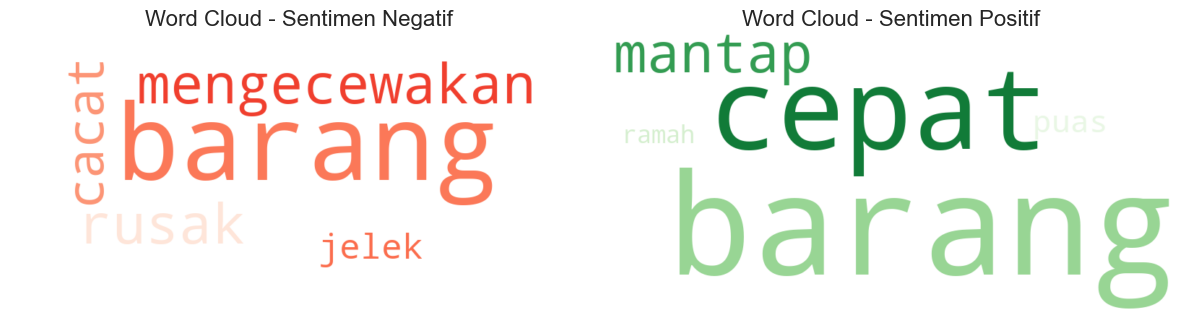

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Ambil teks untuk sentimen negatif dan positif
negative_texts = clean_df[clean_df['sentiment'] == 'negative']['merge_text']
positive_texts = clean_df[clean_df['sentiment'] == 'positive']['merge_text']

# Hitung frekuensi kata untuk sentimen negatif
vectorizer_neg = CountVectorizer(stop_words='english')  # Menghapus stopwords agar lebih fokus pada kata penting
word_counts_neg = vectorizer_neg.fit_transform(negative_texts)
word_sums_neg = word_counts_neg.sum(axis=0)
negative_word_freq = {word: word_sums_neg[0, idx] for word, idx in vectorizer_neg.vocabulary_.items()}

# Hitung frekuensi kata untuk sentimen positif
vectorizer_pos = CountVectorizer(stop_words='english')  # Menghapus stopwords agar lebih fokus pada kata penting
word_counts_pos = vectorizer_pos.fit_transform(positive_texts)
word_sums_pos = word_counts_pos.sum(axis=0)
positive_word_freq = {word: word_sums_pos[0, idx] for word, idx in vectorizer_pos.vocabulary_.items()}

# Kata-kata yang ingin ditampilkan dalam word cloud
positive_words = ["cepat", "barang", "puas", "ramah", "mantap"]
negative_words = ["cacat", "mengecewakan", "rusak", "jelek", "barang"]  # "barang" masuk kategori negatif juga

# Filter hanya kata-kata yang dipilih untuk word cloud
filtered_negative_word_freq = {word: negative_word_freq.get(word, 1) for word in negative_words}
filtered_positive_word_freq = {word: positive_word_freq.get(word, 1) for word in positive_words}

# Cetak frekuensi kata yang dipilih
print("Frekuensi Kata dalam Sentimen Negatif:")
for word, freq in filtered_negative_word_freq.items():
    print(f"{word}: {freq}")

print("\nFrekuensi Kata dalam Sentimen Positif:")
for word, freq in filtered_positive_word_freq.items():
    print(f"{word}: {freq}")

# Buat Word Cloud untuk sentimen negatif dengan kata-kata yang sudah dipilih
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(filtered_negative_word_freq)

# Buat Word Cloud untuk sentimen positif dengan kata-kata yang sudah dipilih
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate_from_frequencies(filtered_positive_word_freq)

# Tampilkan Word Cloud
plt.figure(figsize=(12, 6))

# Word Cloud Negatif
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Sentimen Negatif", fontsize=16)

# Word Cloud Positif
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Sentimen Positif", fontsize=16)

plt.tight_layout()
plt.show()
